In [1]:
%matplotlib notebook

In [2]:
import warnings
warnings.simplefilter('ignore')

import json
import pandas as pd
import pprint
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
with open('data/yzy_cream_9.json') as f:
    org = json.load(f)

    print(json.dumps(org, indent=4))
    travis_white = pd.DataFrame(org["ProductActivity"])

{
    "ProductActivity": [
        {
            "chainId": "12897400229930650944",
            "amount": 290,
            "createdAt": "2019-07-25T18:10:08+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "85367bf7-70e3-4e01-8ead-9027e314aa64",
            "state": "480",
            "customerId": null,
            "localAmount": 290,
            "localCurrency": "USD"
        },
        {
            "chainId": "12528259488066673344",
            "amount": 290,
            "createdAt": "2019-07-25T14:19:16+00:00",
            "shoeSize": "9",
            "productId": null,
            "skuUuid": "85367bf7-70e3-4e01-8ead-9027e314aa64",
            "state": "480",
            "customerId": null,
            "localAmount": 290,
            "localCurrency": "USD"
        },
        {
            "chainId": "12921419432219285045",
            "amount": 300,
            "createdAt": "2019-07-24T22:53:56+00:00",
            "shoeSize": "9",
        

In [4]:
travis_white_data =  travis_white.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})
travis_white_data.head()

price               chainId              purchase_date customerId  \
0  290.0  12897400229930650944  2019-07-25T18:10:08+00:00       None   
1  290.0  12528259488066673344  2019-07-25T14:19:16+00:00       None   
2  300.0  12921419432219285045  2019-07-24T22:53:56+00:00       None   
3  298.0  13119591158602465686  2019-07-24T14:34:48+00:00       None   
4  299.0  13037956240091785694  2019-07-24T13:56:19+00:00       None   

   localAmount localCurrency productId shoe_size  \
0          290           USD      None         9   
1          290           USD      None         9   
2          300           USD      None         9   
3          298           USD      None         9   
4          299           USD      None         9   

                                    sku state  
0  85367bf7-70e3-4e01-8ead-9027e314aa64   480  
1  85367bf7-70e3-4e01-8ead-9027e314aa64   480  
2  85367bf7-70e3-4e01-8ead-9027e314aa64   480  
3  85367bf7-70e3-4e01-8ead-9027e314aa64   480  
4  85367bf7-70e3-4e01-8ead-9027e314aa64   480

In [5]:
travis_white_data =  travis_white_data.rename(index=str, columns={"amount": "price", "createdAt": "purchase_date", "skuUuid": "sku", "shoeSize": "shoe_size"})

In [6]:
new_travis_white_data = travis_white_data[['price', 'purchase_date', 'shoe_size']]
new_travis_white_data.head()

price              purchase_date shoe_size
0  290.0  2019-07-25T18:10:08+00:00         9
1  290.0  2019-07-25T14:19:16+00:00         9
2  300.0  2019-07-24T22:53:56+00:00         9
3  298.0  2019-07-24T14:34:48+00:00         9
4  299.0  2019-07-24T13:56:19+00:00         9

In [7]:
size9_travis_white = new_travis_white_data.loc[new_travis_white_data["shoe_size"] == "9", : ]
size9_travis_white.head()

price              purchase_date shoe_size
0  290.0  2019-07-25T18:10:08+00:00         9
1  290.0  2019-07-25T14:19:16+00:00         9
2  300.0  2019-07-24T22:53:56+00:00         9
3  298.0  2019-07-24T14:34:48+00:00         9
4  299.0  2019-07-24T13:56:19+00:00         9

In [8]:
newsize9 = size9_travis_white["purchase_date"].str.replace(r"00:00", " ")
newsize9.head()

0    2019-07-25T18:10:08+ 
1    2019-07-25T14:19:16+ 
2    2019-07-24T22:53:56+ 
3    2019-07-24T14:34:48+ 
4    2019-07-24T13:56:19+ 
Name: purchase_date, dtype: object

In [9]:
new2size9 = newsize9.str.replace(r"+", " ")
new2size9.head()

0    2019-07-25T18:10:08  
1    2019-07-25T14:19:16  
2    2019-07-24T22:53:56  
3    2019-07-24T14:34:48  
4    2019-07-24T13:56:19  
Name: purchase_date, dtype: object

In [10]:
new3size9 = new2size9.str.replace(r"T", " ")
new3size9.head()

0    2019-07-25 18:10:08  
1    2019-07-25 14:19:16  
2    2019-07-24 22:53:56  
3    2019-07-24 14:34:48  
4    2019-07-24 13:56:19  
Name: purchase_date, dtype: object

In [11]:
new3size9
new3size_new=[i.split()[0] for i in new3size9]
new3size_new

['2019-07-25',
 '2019-07-25',
 '2019-07-24',
 '2019-07-24',
 '2019-07-24',
 '2019-07-24',
 '2019-07-23',
 '2019-07-23',
 '2019-07-23',
 '2019-07-23',
 '2019-07-23',
 '2019-07-23',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-22',
 '2019-07-21',
 '2019-07-21',
 '2019-07-21',
 '2019-07-21',
 '2019-07-21',
 '2019-07-21',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-20',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-19',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-18',
 '2019-07-17',
 '2019-07-17',
 '2019-07-17',
 '2019-07-17',
 '2019-07-17',
 '2019-07-17',
 '2019-07-17',
 '2019-07-

In [12]:
size9sum = pd.DataFrame({"Price": size9_travis_white["price"],"Purchase_date": new3size_new, "Shoe_size": size9_travis_white["shoe_size"]})
size9sum.head()

Price Purchase_date Shoe_size
0  290.0    2019-07-25         9
1  290.0    2019-07-25         9
2  300.0    2019-07-24         9
3  298.0    2019-07-24         9
4  299.0    2019-07-24         9

In [36]:

size9sum["Purchase_date"] = pd.to_datetime(size9sum["Purchase_date"]).dt.strftime("%Y-%m-%d")
size9sum.head()

Price Purchase_date Shoe_size
0  290.0    2019-07-25         9
1  290.0    2019-07-25         9
2  300.0    2019-07-24         9
3  298.0    2019-07-24         9
4  299.0    2019-07-24         9

In [37]:
# purchase = (size9sum["Purchase_date"])
# X = purchase[::-1]

# price = list(size9sum["Price"])
# Y = price[::-1]

2999    2018-11-01
2998    2018-11-01
2997    2018-11-01
2996    2018-11-01
2995    2018-11-01
2994    2018-11-01
2993    2018-11-01
2992    2018-11-01
2991    2018-11-01
2990    2018-11-01
2989    2018-11-01
2988    2018-11-01
2987    2018-11-01
2986    2018-11-01
2985    2018-11-01
2984    2018-11-01
2983    2018-11-01
2982    2018-11-02
2981    2018-11-02
2980    2018-11-02
2979    2018-11-02
2978    2018-11-02
2977    2018-11-02
2976    2018-11-02
2975    2018-11-02
2974    2018-11-02
2973    2018-11-02
2972    2018-11-02
2971    2018-11-02
2970    2018-11-02
           ...    
29      2019-07-20
28      2019-07-20
27      2019-07-20
26      2019-07-20
25      2019-07-20
24      2019-07-21
23      2019-07-21
22      2019-07-21
21      2019-07-21
20      2019-07-21
19      2019-07-21
18      2019-07-22
17      2019-07-22
16      2019-07-22
15      2019-07-22
14      2019-07-22
13      2019-07-22
12      2019-07-22
11      2019-07-23
10      2019-07-23
9       2019-07-23
8       2019

In [49]:
# making it into a list and cutting it
purchase = list(size9sum["Purchase_date"])
X = purchase[::-1]

price = list(size9sum["Price"])
Y = price[::-1]


In [50]:
X1 = purchase = list(size9sum["Purchase_date"])

In [52]:
X2 = dates.datestr2num(X1)

In [53]:
X2

array([737265., 737265., 737264., ..., 736999., 736999., 736999.])

In [55]:
X3 = X2[::-1]

In [47]:
# date_objects = [datetime.strptime(X1, '%Y/%m/%d').date() for date in X1]

ValueError: time data "['2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-01', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-02', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-03', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-04', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-05', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-06', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-07', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-08', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-09', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-10', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-11', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-12', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-13', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-14', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-15', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-16', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-17', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-18', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-19', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-20', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-21', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-22', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-23', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-24', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-25', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-26', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-27', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-28', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-29', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-11-30', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-01', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-02', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-03', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-04', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-05', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-06', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-07', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-08', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-09', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-10', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-11', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-12', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-13', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-14', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-15', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-16', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-17', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-18', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-19', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-20', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-21', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-22', '2018-12-23', '2018-12-23', '2018-12-23', '2018-12-23', '2018-12-24', '2018-12-24', '2018-12-24', '2018-12-24', '2018-12-24', '2018-12-24', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-25', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-26', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-27', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-28', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-29', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-30', '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-03', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-04', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-05', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-06', '2019-01-07', '2019-01-07', '2019-01-07', '2019-01-07', '2019-01-07', '2019-01-07', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-08', '2019-01-09', '2019-01-09', '2019-01-09', '2019-01-09', '2019-01-09', '2019-01-09', '2019-01-09', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-10', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-11', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-12', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-13', '2019-01-14', '2019-01-14', '2019-01-14', '2019-01-14', '2019-01-14', '2019-01-14', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-15', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-16', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-17', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-18', '2019-01-19', '2019-01-19', '2019-01-19', '2019-01-19', '2019-01-19', '2019-01-19', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-20', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-21', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-22', '2019-01-23', '2019-01-23', '2019-01-23', '2019-01-23', '2019-01-23', '2019-01-23', '2019-01-24', '2019-01-24', '2019-01-24', '2019-01-24', '2019-01-24', '2019-01-24', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-25', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-26', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-27', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-28', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-29', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-30', '2019-01-31', '2019-01-31', '2019-01-31', '2019-01-31', '2019-01-31', '2019-01-31', '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-01', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-02', '2019-02-03', '2019-02-03', '2019-02-03', '2019-02-04', '2019-02-04', '2019-02-04', '2019-02-04', '2019-02-04', '2019-02-04', '2019-02-04', '2019-02-05', '2019-02-05', '2019-02-05', '2019-02-05', '2019-02-05', '2019-02-05', '2019-02-05', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-06', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-07', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-08', '2019-02-09', '2019-02-09', '2019-02-09', '2019-02-09', '2019-02-09', '2019-02-09', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-10', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-11', '2019-02-12', '2019-02-12', '2019-02-12', '2019-02-12', '2019-02-12', '2019-02-12', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-13', '2019-02-14', '2019-02-14', '2019-02-14', '2019-02-14', '2019-02-14', '2019-02-14', '2019-02-14', '2019-02-15', '2019-02-15', '2019-02-15', '2019-02-15', '2019-02-15', '2019-02-16', '2019-02-16', '2019-02-16', '2019-02-16', '2019-02-16', '2019-02-16', '2019-02-17', '2019-02-17', '2019-02-17', '2019-02-17', '2019-02-17', '2019-02-17', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-18', '2019-02-19', '2019-02-19', '2019-02-19', '2019-02-19', '2019-02-20', '2019-02-20', '2019-02-20', '2019-02-20', '2019-02-20', '2019-02-20', '2019-02-20', '2019-02-21', '2019-02-21', '2019-02-21', '2019-02-21', '2019-02-21', '2019-02-21', '2019-02-22', '2019-02-22', '2019-02-22', '2019-02-22', '2019-02-22', '2019-02-22', '2019-02-22', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-23', '2019-02-24', '2019-02-24', '2019-02-24', '2019-02-24', '2019-02-24', '2019-02-24', '2019-02-24', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-25', '2019-02-26', '2019-02-26', '2019-02-26', '2019-02-26', '2019-02-26', '2019-02-26', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-27', '2019-02-28', '2019-02-28', '2019-02-28', '2019-02-28', '2019-02-28', '2019-02-28', '2019-02-28', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-01', '2019-03-02', '2019-03-02', '2019-03-02', '2019-03-02', '2019-03-02', '2019-03-02', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-03', '2019-03-04', '2019-03-04', '2019-03-04', '2019-03-04', '2019-03-04', '2019-03-04', '2019-03-05', '2019-03-05', '2019-03-05', '2019-03-05', '2019-03-06', '2019-03-06', '2019-03-06', '2019-03-06', '2019-03-06', '2019-03-06', '2019-03-06', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-07', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-08', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-09', '2019-03-10', '2019-03-10', '2019-03-10', '2019-03-10', '2019-03-10', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-11', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-12', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-13', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-14', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-15', '2019-03-16', '2019-03-16', '2019-03-16', '2019-03-17', '2019-03-17', '2019-03-17', '2019-03-17', '2019-03-17', '2019-03-17', '2019-03-17', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-18', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-19', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-20', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-21', '2019-03-22', '2019-03-22', '2019-03-22', '2019-03-22', '2019-03-22', '2019-03-22', '2019-03-22', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-23', '2019-03-24', '2019-03-24', '2019-03-24', '2019-03-24', '2019-03-24', '2019-03-25', '2019-03-25', '2019-03-25', '2019-03-25', '2019-03-25', '2019-03-25', '2019-03-25', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-26', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-27', '2019-03-28', '2019-03-28', '2019-03-28', '2019-03-28', '2019-03-28', '2019-03-28', '2019-03-28', '2019-03-29', '2019-03-29', '2019-03-29', '2019-03-29', '2019-03-29', '2019-03-30', '2019-03-30', '2019-03-30', '2019-03-30', '2019-03-30', '2019-03-30', '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31', '2019-03-31', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-01', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-02', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-03', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-04', '2019-04-05', '2019-04-05', '2019-04-05', '2019-04-05', '2019-04-05', '2019-04-05', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-06', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-07', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-08', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-09', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-10', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-11', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-12', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-13', '2019-04-14', '2019-04-14', '2019-04-14', '2019-04-14', '2019-04-14', '2019-04-14', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-15', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-16', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-17', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-18', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-19', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-20', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-21', '2019-04-22', '2019-04-22', '2019-04-22', '2019-04-22', '2019-04-22', '2019-04-22', '2019-04-22', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-23', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-24', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-25', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-26', '2019-04-27', '2019-04-27', '2019-04-27', '2019-04-27', '2019-04-27', '2019-04-27', '2019-04-27', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-28', '2019-04-29', '2019-04-29', '2019-04-29', '2019-04-29', '2019-04-29', '2019-04-29', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-04-30', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-01', '2019-05-02', '2019-05-02', '2019-05-02', '2019-05-02', '2019-05-02', '2019-05-02', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-03', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-04', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-05', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-06', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-07', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-08', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-09', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-10', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-11', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-12', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-13', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-14', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-15', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-16', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-17', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-18', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-19', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-20', '2019-05-21', '2019-05-21', '2019-05-21', '2019-05-21', '2019-05-21', '2019-05-21', '2019-05-21', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-22', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-23', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-24', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-25', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-26', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-27', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-28', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-29', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-30', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-05-31', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-01', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-02', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-03', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-04', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-05', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-06', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-07', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-08', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-09', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-10', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-11', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-12', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-13', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-14', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-15', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-16', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-17', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-18', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-19', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-20', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-21', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-22', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-23', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-24', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-25', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-26', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-27', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-28', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-29', '2019-06-30', '2019-06-30', '2019-06-30', '2019-06-30', '2019-06-30', '2019-06-30', '2019-06-30', '2019-06-30', '2019-07-01', '2019-07-01', '2019-07-01', '2019-07-01', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-02', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-03', '2019-07-04', '2019-07-04', '2019-07-04', '2019-07-04', '2019-07-04', '2019-07-04', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-05', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-06', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-07', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-08', '2019-07-09', '2019-07-09', '2019-07-09', '2019-07-09', '2019-07-09', '2019-07-09', '2019-07-09', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-10', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-11', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-12', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-13', '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-14', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-15', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-16', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-17', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-18', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-19', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-20', '2019-07-21', '2019-07-21', '2019-07-21', '2019-07-21', '2019-07-21', '2019-07-21', '2019-07-22', '2019-07-22', '2019-07-22', '2019-07-22', '2019-07-22', '2019-07-22', '2019-07-22', '2019-07-23', '2019-07-23', '2019-07-23', '2019-07-23', '2019-07-23', '2019-07-23', '2019-07-24', '2019-07-24', '2019-07-24', '2019-07-24', '2019-07-25', '2019-07-25']" does not match format '%Y/%m/%d'

In [18]:
# from datetime import datetime
# datetime.strptime(X1, '%Y-%m-%d')

<IPython.core.display.Javascript object>


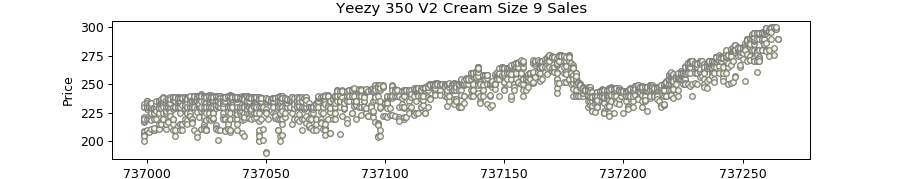

Text(0, 0.5, 'Price')

In [56]:
plt.figure(figsize=(10, 2))
plt.scatter(X3,Y, marker="o", facecolors="beige", edgecolor="grey",
            s=20, alpha=1)
plt.title("Yeezy 350 V2 Cream Size 9 Sales")
plt.xlabel("Date")
plt.ylabel("Price")
# plt.xlim('2.0190101', '2.0190720')
# plt.ylim(180, 310)

# import plotly.express as px
# iris = px.data.iris()
# fig = px.scatter(iris, X, Y)
# fig.show()


In [20]:
# plt.savefig("./yzy_cream_size9.png")

In [21]:
time.stop 

NameError: name 'time' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 150, random_state = 0)

In [ ]:
X = np.array(X)
X

In [ ]:
X = X.reshape(-1,1)

X

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

# X_train
X_test

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

X_test

In [ ]:
X_test = X_test.astype(float)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)
y_pred

In [ ]:
import pickle
pickle.dump(regressor, open('model2.pkl','wb'))

In [ ]:
model = pickle.load( open('model2.pkl','rb'))
print(model.predict([[20210102]]))